# Data Loading

In [1]:
import DataLoader
import importlib

In [2]:
importlib.reload(DataLoader)
my_loader = DataLoader.DataLoader()

In [3]:
the_data = my_loader.load_data('./Data/allignmentChartData.xlsx')
aidan_data = my_loader.load_data('./Data/AidanData.xlsx')

dataframe            Hoe/Bitch  Tits/Boob  Stripper/Prostitute  4th Of July/Christmas  \
Aidan      -0.766265  -0.013514            -1.000000              -0.352459   
Anish       0.437659  -0.099099            -0.378613              -0.642077   
Brian       0.903308  -0.695946             0.594164              -0.240437   
Cass       -0.137349  -0.509009             0.474801               0.500000   
Dina        0.386768   0.941573            -0.780347               0.687117   
Jack       -1.106024  -0.880631             1.037135               0.355828   
KDawg      -0.424096  -1.000000             0.371353              -0.502732   
Madi        0.641221   0.051685            -0.014451               0.641104   
Moll Ball   0.819338   0.701124             0.883289              -0.513661   
Nick       -0.542169   0.550562             0.687003               0.840491   
Sam         0.473282  -1.263514            -0.202312              -0.106557   
Shawty     -0.544578   0.914607           

In [4]:
euclidean_distances = my_loader.calculate_distances(the_data, 2, 2)
manhattan_distances = my_loader.calculate_distances(the_data, 1, 2)
cosine_distance = my_loader.calculate_cosine_distance(the_data)

In [5]:
magnitudes = my_loader.calculate_magnitudes(the_data, 2, 2)
print(magnitudes)

{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}


In [6]:
column_pairs = my_loader.produce_word_pairs(the_data)
print(column_pairs)

{'Hoe/Bitch': ('Hoe', 'Bitch'), 'Tits/Boob': ('Tits', 'Boob'), 'Stripper/Prostitute': ('Stripper', 'Prostitute'), '4th Of July/Christmas': ('4th Of July', 'Christmas'), 'Andriod/Iphone': ('Andriod', 'Iphone'), 'Big Spoon/Little Spoon': ('Big Spoon', 'Little Spoon'), 'Oppenheimer/Barbie': ('Oppenheimer', 'Barbie'), 'Bear/Twink': ('Bear', 'Twink'), 'Times New Roman/Arial': ('Times New Roman', 'Arial'), 'Bold/Italic': ('Bold', 'Italic'), 'Pigeon/Mourning Dove': ('Pigeon', 'Mourning Dove'), 'Crow/Raven': ('Crow', 'Raven'), 'Hyper Pop/Folk': ('Hyper Pop', 'Folk'), 'Jazz/Post Rock': ('Jazz', 'Post Rock'), 'Will/Phil': ('Will', 'Phil'), 'BCNR/ModestMouse': ('BCNR', 'ModestMouse'), 'Mo Bamba/Obama': ('Mo Bamba', 'Obama'), 'Lego Batman/Real Batman': ('Lego Batman', 'Real Batman'), 'Pasta/Rice': ('Pasta', 'Rice'), 'Chicken Parmesan/Shrimp Scampi': ('Chicken Parmesan', 'Shrimp Scampi'), 'Biter/Non-Biter': ('Biter', 'Non-Biter'), 'Swimmer/Non-Swimmer': ('Swimmer', 'Non-Swimmer'), 'Holds Hands/Hold

# the way this will work
the plan will be every word (e.g. Barbie) will produce two functions that explain how they map to both words in the pairing. Then for each person plug in their value to both function and sum them together.

# Predictor

In [7]:
import Predictor
import OpenAPIFunction
import copy

In [8]:
importlib.reload(OpenAPIFunction)
importlib.reload(Predictor)
my_predictor = Predictor.Predictor()
demo = False

In [9]:
# test_func = my_predictor.generate_function('something', 'anotherThing', demo=demo)
# test_func.calculate(1)

In [10]:
encodings = my_predictor.generate_encodings(x_axis=('MainCharacter/NPC', ('Main Character', 'NPC')), y_axis=('Good/Evil', ('Good', 'Evil')), word_pairs=column_pairs, demo=demo)
print(encodings)

{'Hoe': TextDoc(id='19708a2f92eecfda3801da8c5acf9d2b', text='Hoe', url=None, embedding=NdArrayEmbedding([ 0.01411261, -0.01311715, -0.00169297, ..., -0.0099005 ,
                   0.02145334,  0.00400557]), bytes_=None), 'Bitch': TextDoc(id='6f8c7d049d12b448b0801ea071f4f69a', text='Bitch', url=None, embedding=NdArrayEmbedding([-0.03045207, -0.01015069,  0.01105791, ..., -0.01280256,
                  -0.00532594, -0.01339891]), bytes_=None), 'Tits': TextDoc(id='fb5a941c2cef5d8969604333b9ad8ea9', text='Tits', url=None, embedding=NdArrayEmbedding([-0.0219434 , -0.01478305, -0.01372087, ..., -0.0156453 ,
                  -0.00588885, -0.02013145]), bytes_=None), 'Boob': TextDoc(id='de7fc7e43e4bd089d0cead36636953e7', text='Boob', url=None, embedding=NdArrayEmbedding([-0.03658451, -0.02002534, -0.00581911, ..., -0.01839346,
                  -0.01154967, -0.02259334]), bytes_=None), 'Stripper': TextDoc(id='af9493ed28c8636673070cba2a0b60fa', text='Stripper', url=None, embedding=NdArrayEmbe

In [12]:
from scipy.spatial.distance import cosine, euclidean
good_encoding = encodings['Good']
evil_encoding = encodings['Evil']
print(cosine(good_encoding.embedding, evil_encoding.embedding))
print(euclidean(good_encoding.embedding, evil_encoding.embedding))

good_encoding = encodings['Main Character']
evil_encoding = encodings['NPC']
print(cosine(good_encoding.embedding, evil_encoding.embedding))
print(euclidean(good_encoding.embedding, evil_encoding.embedding))

0.1716529921332317
0.5859232118117922
0.18505340137229276
0.6083640359631853


In [13]:
functions = my_predictor.generate_functions(column_pairs, ('Main Character', 'NPC'), encodings, demo=demo)
gaused_functions = copy.deepcopy(functions)
my_predictor.transform_to_gausian_functions(gaused_functions, conversion_ratio=1)
print(functions)

pos axis 

TextDoc(
    id='d767183d1e138e1e86963acab334aa94',
    text='Main Character',
    url=None,
    embedding=NdArrayEmbedding([ 0.00086203, -0.00373657,  0.00161631, ..., -0.01521154,
                  -0.02068875, -0.00797711]),
    bytes_=None
)
neg axis 

TextDoc(
    id='d1726292b4f9c86f3c11698998da8dff',
    text='NPC',
    url=None,
    embedding=NdArrayEmbedding([ 0.00152797, -0.03001764,  0.01197651, ..., -0.03510784,
                  -0.01330724, -0.01308909]),
    bytes_=None
)
triggered negation Non-Biter Biter
triggered negation Non-Biter Biter
triggered negation Non-Swimmer Swimmer
triggered negation Non-Swimmer Swimmer
{'Hoe/Bitch': ((<OpenAPIFunction.OpenAPIFunction object at 0x000002627BF53350>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627BE2C350>), (<OpenAPIFunction.OpenAPIFunction object at 0x000002627BA83050>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627AD380D0>)), 'Tits/Boob': ((<OpenAPIFunction.OpenAPIFunction object at 0x000002627D022510>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627B695BD0>), (<OpenAPIFunction.OpenAPIFunction object at 0x000002627D187790>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627D19AF90>)), 'Stripper/Prostitute': ((<OpenAPIFunction.OpenAPIFunction object a

In [14]:
# predictions = my_predictor.make_predictions(the_data, functions)
gaused_predictions = my_predictor.make_predictions(the_data, gaused_functions)
# standardized_predictions = my_predictor.standardize(predictions)
gaused_stand_prediction = my_predictor.standardize(gaused_predictions, scale=0.85)
# print(predictions)
print(gaused_predictions)
# print(standardized_predictions)
print(gaused_stand_prediction)

Hoe/Bitch
from word Hoe to word Main Character distance 0.31287348389338576 val -0.7662650602409639
from word Hoe to word NPC distance 0.4037877392311104 val -0.7662650602409639
from word Bitch to word Main Character distance -0.21470756687996304 val 0.7662650602409639
from word Bitch to word NPC distance 0.24054750362136848 val 0.7662650602409639
total for section 0.27918163667958307 -0.36434081516360683
Tits/Boob
from word Tits to word Main Character distance 0.2615619726269327 val -0.013513513513513514
from word Tits to word NPC distance 0.36817802202808864 val -0.013513513513513514
from word Boob to word Main Character distance -0.03250476839658584 val 0.013513513513513514
from word Boob to word NPC distance 0.1713783080274384 val 0.013513513513513514
total for section 0.001314419284092816 -0.09726702702286838
Stripper/Prostitute
from word Stripper to word Main Character distance -0.2553072598082552 val -1.0
from word Stripper to word NPC distance 0.0016022827049831094 val -1.0
fro

# Post Process

In [15]:
print(magnitudes)
prediction_shift = my_predictor.magnitude_shift(magnitudes, average_shift=-0.05, scaling_factor=0.5)
print(prediction_shift)

{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}
{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}
avg 2.815 std 0.3408550173565629899701901367
{'Aidan': -0.038998254949912575, 'Anish': -0.3470471163523579, 'Brian': 0.10035718235119366, 'Cass': -0.09033973185032035, 'Dina': -0.317709129552125, 'Jack': 0.3130575866528822, 'KDawg': -0.2957056394519505, 'Madi': -0.00232577144

In [16]:
summed = dict()
prediction = gaused_stand_prediction
for name in prediction_shift:
    summed[name] = prediction_shift[name] + prediction[name]
print(summed)

{'Aidan': -0.09847586376163299, 'Anish': -0.7293348098325229, 'Brian': -0.11825658089888404, 'Cass': -0.8998665787348119, 'Dina': -0.2724447722905147, 'Jack': 0.30971995655900236, 'KDawg': -0.5782762949966929, 'Madi': 0.04080707037815009, 'Moll Ball': -0.2055139064991128, 'Nick': 0.5806496880754615, 'Sam': 0.5281961880606729, 'Shawty': 1.0509028616969203, 'Tea': 0.0004550280234562054, 'Vedant': -0.30856198577949057}


# Good Evil

In [17]:
GE_functions = my_predictor.generate_functions(column_pairs, ('Good', 'Evil'), encodings, demo=demo)
GE_gaused_functions = copy.deepcopy(functions)
my_predictor.transform_to_gausian_functions(gaused_functions, conversion_ratio=1)
print(functions)

pos axis 

TextDoc(
    id='405026444f18c6ed77f0ba6a5ac58a67',
    text='Good',
    url=None,
    embedding=NdArrayEmbedding([-0.00279003, -0.01814983,  0.01167981, ..., -0.01387546,
                  -0.00334869, -0.01495379]),
    bytes_=None
)
neg axis 

TextDoc(
    id='5bdb4e0c600dc56259a15e19da51a68a',
    text='Evil',
    url=None,
    embedding=NdArrayEmbedding([-0.00909116, -0.00671565, -0.01721927, ..., -0.00186189,
                  -0.01192894, -0.03161361]),
    bytes_=None
)
triggered negation Non-Biter Biter
triggered negation Non-Biter Biter
triggered negation Non-Swimmer Swimmer
triggered negation Non-Swimmer Swimmer
{'Hoe/Bitch': ((<OpenAPIFunction.OpenAPIFunction object at 0x000002627BF53350>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627BE2C350>), (<OpenAPIFunction.OpenAPIFunction object at 0x000002627BA83050>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627AD380D0>)), 'Tits/Boob': ((<OpenAPIFunction.OpenAPIFunction object at 0x000002627D022510>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627B695BD0>), (<OpenAPIFunction.OpenAPIFunction object at 0x000002627D187790>, <OpenAPIFunction.OpenAPIFunction object at 0x000002627D19AF90>)), 'Stripper/Prostitute': ((<OpenAPIFunction.OpenAPIFunction object 

In [18]:
GE_predictions = my_predictor.make_predictions(the_data, GE_functions)
GE_standardized_predictions = my_predictor.standardize(GE_predictions)

print(GE_predictions)

print(GE_standardized_predictions)


Hoe/Bitch
from word Hoe to word Good distance 0.21334524090235318 val -0.7662650602409639
from word Hoe to word Evil distance 0.22633403074696612 val -0.7662650602409639
from word Bitch to word Good distance 0.19393046309386608 val 0.7662650602409639
from word Bitch to word Evil distance 0.187697574752397 val 0.7662650602409639
total for section -0.014728900393190525 0.019221678186081975
Tits/Boob
from word Tits to word Good distance 0.21084278473258422 val -0.013513513513513514
from word Tits to word Evil distance 0.20754187090765897 val -0.013513513513513514
from word Boob to word Good distance 0.19020456803278596 val 0.013513513513513514
from word Boob to word Evil distance 0.19940785451917553 val 0.013513513513513514
total for section 0.00016897567988263286 -0.012504200311314832
Stripper/Prostitute
from word Stripper to word Good distance 0.21959969238711963 val -1.0
from word Stripper to word Evil distance 0.2239444651032283 val -1.0
from word Prostitute to word Good distance 0.20

In [19]:
GE_gaused_predictions = my_predictor.make_predictions(the_data, GE_gaused_functions)
GE_gaused_stand_prediction = my_predictor.standardize(GE_gaused_predictions, scale=0.85)
print(GE_gaused_predictions)
print(GE_gaused_stand_prediction)

Hoe/Bitch
from word Hoe to word Main Character distance 0.22769779553474578 val -0.7662650602409639
from word Hoe to word NPC distance 0.23213382771922508 val -0.7662650602409639
from word Bitch to word Main Character distance 0.20195522620435769 val 0.7662650602409639
from word Bitch to word NPC distance 0.22416875187631358 val 0.7662650602409639
total for section 0.01362227211811462 -0.017777493487476627
Tits/Boob
from word Tits to word Main Character distance 0.22519412309562492 val -0.013513513513513514
from word Tits to word NPC distance 0.2303963020583042 val -0.013513513513513514
from word Boob to word Main Character distance 0.21084555341621214 val 0.013513513513513514
from word Boob to word NPC distance 0.22079373905033384 val 0.013513513513513514
total for section 6.413522528976243e-05 -0.0047460066714424196
Stripper/Prostitute
from word Stripper to word Main Character distance 0.19997422175306623 val -1.0
from word Stripper to word NPC distance 0.21250975861529997 val -1.0
f

# RESULTS

In [20]:
GOOD_EVIL = {'Aidan': -1.0019546608056418, 'Anish': 0.5134234538926529, 'Brian': 0.48359695260606506, 'Cass': -0.17514604390604765, 'Dina': -0.5288006759460153, 'Jack': -0.20613108166537222, 'KDawg': 0.3258904553223815, 'Madi': 0.1610594098847092, 'Moll Ball': 0.04313567348985606, 'Nick': -0.24403959908064643, 'Sam': 0.9515629592529953, 'Shawty': -0.322327895103304, 'Tea': -0.47071538068475793, 'Vedant': 0.47044643274312525}
MC_NPC = {'Aidan': -0.09847586376163299, 'Anish': -0.7293348098325229, 'Brian': -0.11825658089888404, 'Cass': -0.8998665787348119, 'Dina': -0.2724447722905147, 'Jack': 0.30971995655900236, 'KDawg': -0.5782762949966929, 'Madi': 0.04080707037815009, 'Moll Ball': -0.2055139064991128, 'Nick': 0.5806496880754615, 'Sam': 0.5281961880606729, 'Shawty': 1.0509028616969203, 'Tea': 0.0004550280234562054, 'Vedant': -0.30856198577949057}
MC_NPC = summed

x_axis_title = 'NPC/MainCharacter'
x_axis_data = MC_NPC
y_axis_title = 'Evil/Good'
y_axis_data = GOOD_EVIL


# Data Visualization

## alignment chart

In [21]:
import DataVisualization

In [22]:
importlib.reload(DataVisualization)
my_visualizer = DataVisualization.DataVisualization()

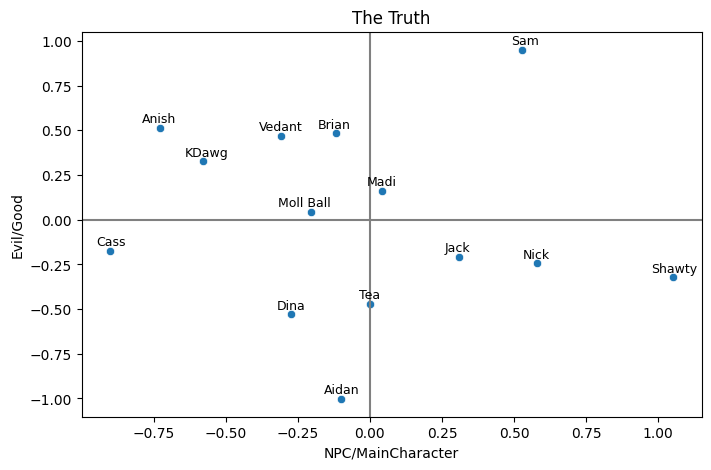

In [23]:
my_visualizer.create_allignment_chart(x_axis_data, y_axis_data, x_axis_title, y_axis_title, title="The Truth")

lower dict {'Aidan': Decimal('3.40'), 'Anish': Decimal('2.73'), 'Brian': Decimal('3.57'), 'Cass': Decimal('3.09'), 'Dina': Decimal('3.27'), 'Jack': Decimal('3.57'), 'KDawg': Decimal('3.09'), 'Madi': Decimal('3.27'), 'Moll Ball': Decimal('3.01'), 'Nick': Decimal('3.35'), 'Sam': Decimal('3.81'), 'Shawty': Decimal('3.08'), 'Tea': Decimal('3.08'), 'Vedant': Decimal('2.73')}
upper dict {'Aidan': 0.84, 'Anish': 0.57, 'Brian': 0.63, 'Cass': 0.69, 'Dina': 0.74, 'Jack': 0.63, 'KDawg': 0.69, 'Madi': 0.73, 'Moll Ball': 0.67, 'Nick': 0.62, 'Sam': 0.67, 'Shawty': 0.62, 'Tea': 0.71, 'Vedant': 0.57}
middle min 2.30
middle min 3.52
image [[ 0.   -0.5   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.  ]
 [-0.5   0.    1.    1.    1.    1.    1.    1.   -0.5   1.    1.    1.
   1.   -0.5 ]
 [-1.   -1.    0.    1.    1.   -0.5   1.    1.    1.    1.   -0.5   1.
   1.    1.  ]
 [-1.   -1.   -1.    0.    1.    1.   -0.5   1.    1.    1.    1.    1.
   1.    1.  ]
 [-1.   -1.   -1.   -1

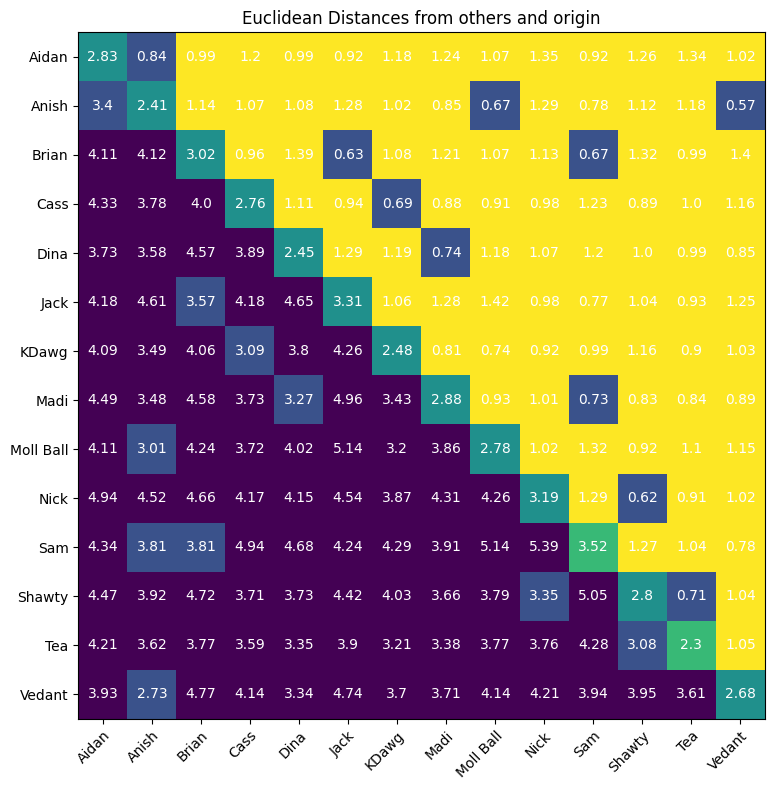

In [24]:
my_visualizer.create_distance_matrix(euclidean_distances, magnitudes , cosine_distance)

In [ ]:
# Correlations

In [25]:
from scipy.stats import pearsonr
import numpy as np

In [38]:
names = list(euclidean_distances.keys())
personal_magnitudes = []
output_magnitudes = []
personal_dict = dict()
out_dict = dict()
for name in names:
    mc_npc_value = float(MC_NPC[name])
    good_bad_value = float(GOOD_EVIL[name])
    out_mag = float(mc_npc_value)
    output_magnitudes.append(out_mag)
    personal_magnitudes.append(float(magnitudes[name]))



In [39]:
magnitude_corre = pearsonr(personal_magnitudes, output_magnitudes)
print(magnitude_corre)

PearsonRResult(statistic=0.5675321529495111, pvalue=0.034273073716987484)


In [42]:
data_distances = []
prediction_distances = []
name_pairs = []
names = list(euclidean_distances.keys())
for inner_name_index in range(len(names) - 1):
    for outer_name_index in range(inner_name_index + 1, len(names)):
        inner_name = names[inner_name_index]
        outer_name = names[outer_name_index]
        name_pairs.append((inner_name, outer_name))
        data_distances.append(float(euclidean_distances[inner_name][outer_name]))
        mc_npc_difference = float(MC_NPC[inner_name] - MC_NPC[outer_name])
        good_bad_difference = float(GOOD_EVIL[inner_name] - GOOD_EVIL[outer_name])
        magnitude = np.linalg.norm([float(mc_npc_difference), float(good_bad_difference)])
        prediction_distances.append(magnitude)
print(name_pairs)

[('Aidan', 'Anish'), ('Aidan', 'Brian'), ('Aidan', 'Cass'), ('Aidan', 'Dina'), ('Aidan', 'Jack'), ('Aidan', 'KDawg'), ('Aidan', 'Madi'), ('Aidan', 'Moll Ball'), ('Aidan', 'Nick'), ('Aidan', 'Sam'), ('Aidan', 'Shawty'), ('Aidan', 'Tea'), ('Aidan', 'Vedant'), ('Anish', 'Brian'), ('Anish', 'Cass'), ('Anish', 'Dina'), ('Anish', 'Jack'), ('Anish', 'KDawg'), ('Anish', 'Madi'), ('Anish', 'Moll Ball'), ('Anish', 'Nick'), ('Anish', 'Sam'), ('Anish', 'Shawty'), ('Anish', 'Tea'), ('Anish', 'Vedant'), ('Brian', 'Cass'), ('Brian', 'Dina'), ('Brian', 'Jack'), ('Brian', 'KDawg'), ('Brian', 'Madi'), ('Brian', 'Moll Ball'), ('Brian', 'Nick'), ('Brian', 'Sam'), ('Brian', 'Shawty'), ('Brian', 'Tea'), ('Brian', 'Vedant'), ('Cass', 'Dina'), ('Cass', 'Jack'), ('Cass', 'KDawg'), ('Cass', 'Madi'), ('Cass', 'Moll Ball'), ('Cass', 'Nick'), ('Cass', 'Sam'), ('Cass', 'Shawty'), ('Cass', 'Tea'), ('Cass', 'Vedant'), ('Dina', 'Jack'), ('Dina', 'KDawg'), ('Dina', 'Madi'), ('Dina', 'Moll Ball'), ('Dina', 'Nick'), ('Di

In [44]:
distance_corre = pearsonr(data_distances, prediction_distances)
print(distance_corre)

PearsonRResult(statistic=0.21214188249584343, pvalue=0.043511212225390096)
